# Machine Learning Use Case "Surface Type Classification"
## Section A - Introduction

Q1 - What kind of data we have?


Q2 - What kind of objective we have?

Q3 - Is there a specific Methodology to follow? OSEMN

## Section B - Rsearch Questions:

RQ1 - What are the main features that help in detecting the surface type? 

RQ2 - How to use these features to classify the surface type? 

RQ3 - How to evaluate the reliability of the model?

## Section C - Research Objectives

RO1 - Utilize IoT sensors to capture x, y, z accelerometer and x, y, z gyroscope data.

RO2 - Employ machine learning techniques to understand patterns and classify surfaces accordingly. 

RO3 - Perform a train-test split to evaluate the performance of the model. 

## Section D - Research Methodology

## Section E - Exploratory Data Analysis (EDA)

#### Section E-1 Loading data


In [2]:
# Import necessary libraries
import pandas as pd # For data frame reading/manipulation
import numpy as np # For mathematical calculations
import matplotlib.pyplot as plt # For plotting


In [3]:
# Grass Slopy Wet Surface DataFrame

GSW = pd.read_csv('../datasets/Bushral/24_grass_slopy_wet.csv', header = None) # Setting header as 'None' because the data does not have the column names

# Asphalt Flat Wet Surface DataFrame
AFW = pd.read_csv('../datasets/Bushral/22_asphalt_flat_wet.csv', header = None) 

# Concerete Dry Flat Surface DataFrame
CDF = pd.read_csv('../datasets/Bushral/17_concrete_dry_flat.csv', header = None) 

# Grass Moist Slopy Surface DataFrame 
GMS = pd.read_csv('../datasets/Bushral/10_grass_moist_slopy.csv', header = None)

# Concerete Dry Bumpy Flat Hard Surface DataFrame
CDB = pd.read_csv('../datasets/Bushral/2_concrete_dry_bumpy_flat_hard.csv', header = None)

# Asphalt Dry Flat Hard Surface DataFrame
ADF = pd.read_csv('../datasets/Bushral/2_concrete_dry_bumpy_flat_hard.csv', header = None)

# Tile Smooth Surface DataFrame
TM = pd.read_csv('../datasets/Bushral/11_tile_smooth.csv', header = None)

In [4]:
# Defining the dictionary of tables we have to easily access them later on

# Dictionary = {'key':'Item'}
dict_of_tables = {'GSW': GSW, 'AFW': AFW, 'CDF': CDF, 'GMS': GMS, 'CDB': CDB, 'ADF': ADF, 'TM': TM}

#### Section E-2 Defining Columns names


In [5]:
for table_name, table in dict_of_tables.items():
    print(table)

                            0         1         2         3         4  \
0     2024-03-21 13:46:48.330 -0.049316 -0.229492 -0.989746  1.663208   
1     2024-03-21 13:46:48.340 -0.036865 -0.238770 -0.980957  1.678467   
2     2024-03-21 13:46:48.349 -0.037842 -0.240479 -0.977051  1.785278   
3     2024-03-21 13:46:48.360 -0.039307 -0.250244 -0.986572  1.770019   
4     2024-03-21 13:46:48.369 -0.040771 -0.251221 -0.989502  1.632690   
...                       ...       ...       ...       ...       ...   
6035  2024-03-21 13:47:48.549  0.006592 -0.150391 -0.999023  0.854492   
6036  2024-03-21 13:47:48.560  0.007324 -0.150879 -0.999512  0.869751   
6037  2024-03-21 13:47:48.569  0.007324 -0.151611 -0.999023  0.869751   
6038  2024-03-21 13:47:48.580  0.004639 -0.156250 -0.997070  0.778198   
6039  2024-03-21 13:47:48.590  0.002197 -0.157959 -0.997559  0.885010   

             5         6  
0    -0.289917  0.381470  
1    -0.396728  0.106812  
2    -0.442505 -0.045776  
3    -0.442505 

In [6]:
# Define column names
column_names = ['Timestamp', 'x-accelerometer', 'y-accelerometer','z-accelerometer',
               'x-gyroscope','y-gyroscope','z-gyroscope']

# Iterate over each DataFrame in the dictionary and apply the code
for table_name, table in dict_of_tables.items():
    # Assign column names to the DataFrame
    table.columns = column_names

#### Section E-3 Exploring head and tail of each table


In [7]:
# # Exploring head and tail of each table
# print('The top 3 rows of GSW are')
# display(GSW.head(3))

# print('The last 3 rows of GSW are')
# display(GSW.tail(3))

# print('-'*25) # Segmenting between tables

# print('The top 3 rows of AFW are')
# display(AFW.head(3))

# print('The last 3 rows of AFW are')
# display(AFW.tail(3))

# print('-'*25) 
# print('The top 3 rows of CDF are')
# display(CDF.head(3))

# print('The last 3 rows of CDF are')
# display(CDF.tail(3))

# print('-'*25) 

# print('The top 3 rows of GMS are')
# display(GMS.head(3))

# print('The last 3 rows of GMS are')
# display(GMS.tail(3))

# print('-'*25) 

# print('The top 3 rows of CDB are')
# display(CDB.head(3))

# print('The last 3 rows of CDB are')
# display(CDB.tail(3))

# print('-'*25) 

# print('The top 3 rows of ADF are')
# display(ADF.head(3))

# print('The last 3 rows of ADF are')
# display(ADF.tail(3))

# print('-'*25) 


# print('The top 3 rows of TM are')
# display(TM.head(3))

# print('The last 3 rows of TM are')
# display(TM.tail(3))

In [8]:
# Iterate over each DataFrame in the dictionary and print head and tail
for table_name, table in dict_of_tables.items():
    
    print(f'The top 3 rows of {table_name} are')
    display(table.head(3))
    
    print(f'The last 3 rows of {table_name} are')
    display(table.tail(3))
    
    print('-'*50) # Segmenting between tables


The top 3 rows of GSW are


,Timestamp,x-accelerometer,y-accelerometer,z-accelerometer,x-gyroscope,y-gyroscope,z-gyroscope
0,2024-03-21 13:46:48.330,-0.049316,-0.229492,-0.989746,1.663208,-0.289917,0.381470
1,2024-03-21 13:46:48.340,-0.036865,-0.238770,-0.980957,1.678467,-0.396728,0.106812
2,2024-03-21 13:46:48.349,-0.037842,-0.240479,-0.977051,1.785278,-0.442505,-0.045776


The last 3 rows of GSW are


,Timestamp,x-accelerometer,y-accelerometer,z-accelerometer,x-gyroscope,y-gyroscope,z-gyroscope
6037,2024-03-21 13:47:48.569,0.007324,-0.151611,-0.999023,0.869751,0.137329,0.289917
6038,2024-03-21 13:47:48.580,0.004639,-0.156250,-0.997070,0.778198,0.122070,0.152588
6039,2024-03-21 13:47:48.590,0.002197,-0.157959,-0.997559,0.885010,0.091553,0.061035


--------------------------------------------------
The top 3 rows of AFW are


,Timestamp,x-accelerometer,y-accelerometer,z-accelerometer,x-gyroscope,y-gyroscope,z-gyroscope
0,2024-03-20 10:27:23.329,0.007080,-0.037842,-1.012207,0.717163,0.289917,0.000000
1,2024-03-20 10:27:23.340,0.006592,-0.036865,-1.011963,0.671387,0.244141,0.076294
2,2024-03-20 10:27:23.350,0.001953,-0.037354,-1.006592,0.778198,0.198364,-0.030518


The last 3 rows of AFW are


,Timestamp,x-accelerometer,y-accelerometer,z-accelerometer,x-gyroscope,y-gyroscope,z-gyroscope
8877,2024-03-20 10:28:51.910,0.013672,-0.075928,-1.005859,0.686645,0.259399,0.061035
8878,2024-03-20 10:28:51.920,0.014648,-0.074951,-1.007080,0.732422,0.259399,0.076294
8879,2024-03-20 10:28:51.930,0.012207,-0.076172,-1.008789,0.671387,0.350952,0.122070


--------------------------------------------------
The top 3 rows of CDF are


,Timestamp,x-accelerometer,y-accelerometer,z-accelerometer,x-gyroscope,y-gyroscope,z-gyroscope
0,2024-03-20 10:03:39.330,-0.012451,-0.043945,-1.011230,0.747681,0.228882,0.061035
1,2024-03-20 10:03:39.340,-0.015625,-0.044922,-1.010498,0.717163,0.167847,0.000000
2,2024-03-20 10:03:39.349,-0.016357,-0.044922,-1.009521,0.671387,0.274658,-0.091553


The last 3 rows of CDF are


,Timestamp,x-accelerometer,y-accelerometer,z-accelerometer,x-gyroscope,y-gyroscope,z-gyroscope
7997,2024-03-20 10:04:59.130,-0.020264,-0.045166,-1.010010,0.747681,0.350952,0.000000
7998,2024-03-20 10:04:59.139,-0.020752,-0.043457,-1.008789,0.762939,0.381470,-0.061035
7999,2024-03-20 10:04:59.150,-0.022705,-0.042969,-1.007324,0.717163,0.396728,-0.030518


--------------------------------------------------
The top 3 rows of GMS are


,Timestamp,x-accelerometer,y-accelerometer,z-accelerometer,x-gyroscope,y-gyroscope,z-gyroscope
0,2024-03-11 10:53:49.259,-0.034912,0.004150,1.047852,0.015259,-0.076294,-0.213623
1,2024-03-11 10:53:49.279,-0.039063,0.002930,1.044922,-0.015259,-0.061035,-0.259399
2,2024-03-11 10:53:49.299,-0.039551,0.000977,1.047119,-0.015259,-0.122070,-0.549316


The last 3 rows of GMS are


,Timestamp,x-accelerometer,y-accelerometer,z-accelerometer,x-gyroscope,y-gyroscope,z-gyroscope
18117,2024-03-11 10:59:55.398,-0.037598,-0.070068,1.047852,-0.045776,-0.122070,-0.427246
18118,2024-03-11 10:59:55.418,-0.037354,-0.070557,1.046875,-0.106812,-0.122070,-0.289917
18119,2024-03-11 10:59:55.439,-0.039063,-0.070068,1.049072,-0.106812,-0.106812,-0.228882


--------------------------------------------------
The top 3 rows of CDB are


,Timestamp,x-accelerometer,y-accelerometer,z-accelerometer,x-gyroscope,y-gyroscope,z-gyroscope
0,2024-03-09 13:05:16.280,-0.013428,-0.030273,1.049561,-0.045776,-0.045776,-0.274658
1,2024-03-09 13:05:16.299,-0.013672,-0.031982,1.046387,-0.091553,-0.137329,-0.442505
2,2024-03-09 13:05:16.319,-0.012695,-0.034668,1.044922,-0.091553,-0.198364,-0.488281


The last 3 rows of CDB are


,Timestamp,x-accelerometer,y-accelerometer,z-accelerometer,x-gyroscope,y-gyroscope,z-gyroscope
27517,2024-03-09 13:14:32.419,-0.050293,-0.050537,1.049805,-0.045776,-0.137329,-0.625610
27518,2024-03-09 13:14:32.439,-0.046143,-0.049072,1.048340,-0.030518,-0.152588,-0.732422
27519,2024-03-09 13:14:32.459,-0.047119,-0.049316,1.049561,-0.030518,-0.183105,-0.381470


--------------------------------------------------
The top 3 rows of ADF are


,Timestamp,x-accelerometer,y-accelerometer,z-accelerometer,x-gyroscope,y-gyroscope,z-gyroscope
0,2024-03-09 13:05:16.280,-0.013428,-0.030273,1.049561,-0.045776,-0.045776,-0.274658
1,2024-03-09 13:05:16.299,-0.013672,-0.031982,1.046387,-0.091553,-0.137329,-0.442505
2,2024-03-09 13:05:16.319,-0.012695,-0.034668,1.044922,-0.091553,-0.198364,-0.488281


The last 3 rows of ADF are


,Timestamp,x-accelerometer,y-accelerometer,z-accelerometer,x-gyroscope,y-gyroscope,z-gyroscope
27517,2024-03-09 13:14:32.419,-0.050293,-0.050537,1.049805,-0.045776,-0.137329,-0.625610
27518,2024-03-09 13:14:32.439,-0.046143,-0.049072,1.048340,-0.030518,-0.152588,-0.732422
27519,2024-03-09 13:14:32.459,-0.047119,-0.049316,1.049561,-0.030518,-0.183105,-0.381470


--------------------------------------------------
The top 3 rows of TM are


,Timestamp,x-accelerometer,y-accelerometer,z-accelerometer,x-gyroscope,y-gyroscope,z-gyroscope
0,2024-03-20 09:34:52.330,-0.004883,-0.042969,-1.011230,0.671387,0.320435,0.045776
1,2024-03-20 09:34:52.340,-0.005859,-0.042236,-1.008057,0.671387,0.259399,0.000000
2,2024-03-20 09:34:52.349,-0.004883,-0.042480,-1.009521,0.671387,0.213623,-0.106812


The last 3 rows of TM are


,Timestamp,x-accelerometer,y-accelerometer,z-accelerometer,x-gyroscope,y-gyroscope,z-gyroscope
6677,2024-03-20 09:35:58.970,-0.003662,-0.049805,-1.006592,0.610352,0.427246,-0.091553
6678,2024-03-20 09:35:58.979,-0.003662,-0.048096,-1.009521,0.595093,0.442505,-0.015259
6679,2024-03-20 09:35:58.990,-0.002930,-0.048828,-1.008301,0.656128,0.320435,-0.320435


--------------------------------------------------


#### Section E-4 Checking datatype


In [9]:
# We will loop through each table to find the datatypes of the columns

for table_name, table in dict_of_tables.items():
    print('The table name is', table_name)
    print('table info is')
    display(table.info())
    print('-'*50)

The table name is GSW
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        6040 non-null   object 
 1   x-accelerometer  6040 non-null   float64
 2   y-accelerometer  6040 non-null   float64
 3   z-accelerometer  6040 non-null   float64
 4   x-gyroscope      6040 non-null   float64
 5   y-gyroscope      6040 non-null   float64
 6   z-gyroscope      6040 non-null   float64
dtypes: float64(6), object(1)
memory usage: 330.4+ KB


None

--------------------------------------------------
The table name is AFW
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        8880 non-null   object 
 1   x-accelerometer  8880 non-null   float64
 2   y-accelerometer  8880 non-null   float64
 3   z-accelerometer  8880 non-null   float64
 4   x-gyroscope      8880 non-null   float64
 5   y-gyroscope      8880 non-null   float64
 6   z-gyroscope      8880 non-null   float64
dtypes: float64(6), object(1)
memory usage: 485.8+ KB


None

--------------------------------------------------
The table name is CDF
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        8000 non-null   object 
 1   x-accelerometer  8000 non-null   float64
 2   y-accelerometer  8000 non-null   float64
 3   z-accelerometer  8000 non-null   float64
 4   x-gyroscope      8000 non-null   float64
 5   y-gyroscope      8000 non-null   float64
 6   z-gyroscope      8000 non-null   float64
dtypes: float64(6), object(1)
memory usage: 437.6+ KB


None

--------------------------------------------------
The table name is GMS
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18120 entries, 0 to 18119
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        18120 non-null  object 
 1   x-accelerometer  18120 non-null  float64
 2   y-accelerometer  18120 non-null  float64
 3   z-accelerometer  18120 non-null  float64
 4   x-gyroscope      18120 non-null  float64
 5   y-gyroscope      18120 non-null  float64
 6   z-gyroscope      18120 non-null  float64
dtypes: float64(6), object(1)
memory usage: 991.1+ KB


None

--------------------------------------------------
The table name is CDB
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27520 entries, 0 to 27519
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        27520 non-null  object 
 1   x-accelerometer  27520 non-null  float64
 2   y-accelerometer  27520 non-null  float64
 3   z-accelerometer  27520 non-null  float64
 4   x-gyroscope      27520 non-null  float64
 5   y-gyroscope      27520 non-null  float64
 6   z-gyroscope      27520 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.5+ MB


None

--------------------------------------------------
The table name is ADF
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27520 entries, 0 to 27519
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        27520 non-null  object 
 1   x-accelerometer  27520 non-null  float64
 2   y-accelerometer  27520 non-null  float64
 3   z-accelerometer  27520 non-null  float64
 4   x-gyroscope      27520 non-null  float64
 5   y-gyroscope      27520 non-null  float64
 6   z-gyroscope      27520 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.5+ MB


None

--------------------------------------------------
The table name is TM
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6680 entries, 0 to 6679
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        6680 non-null   object 
 1   x-accelerometer  6680 non-null   float64
 2   y-accelerometer  6680 non-null   float64
 3   z-accelerometer  6680 non-null   float64
 4   x-gyroscope      6680 non-null   float64
 5   y-gyroscope      6680 non-null   float64
 6   z-gyroscope      6680 non-null   float64
dtypes: float64(6), object(1)
memory usage: 365.4+ KB


None

--------------------------------------------------


In [10]:
# We noticed that the first column 'Timestamp' Dtype is 'object'

#### Section E-5 Fixing 'Timestamp' column datatype into timestamp



In [14]:
for table_name, table in dict_of_tables.items():
    table['Timestamp'] = pd.to_datetime(table['Timestamp']) # using pandas functionality to correct 'Timestamp' column datatype


In [15]:
# randomly checking of one of the tables
GSW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        6040 non-null   datetime64[ns]
 1   x-accelerometer  6040 non-null   float64       
 2   y-accelerometer  6040 non-null   float64       
 3   z-accelerometer  6040 non-null   float64       
 4   x-gyroscope      6040 non-null   float64       
 5   y-gyroscope      6040 non-null   float64       
 6   z-gyroscope      6040 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 330.4 KB


#### Section E-6 Sorting by timestamp

In [16]:
for table_name, table in dict_of_tables.items():

    table.sort_values(by='Timestamp', inplace=True) # Sort the table by 'Timestamp' column #Using 'inplace' Argument to apply the changes on the same table

    # Resetting the index after sorting
    table.reset_index(drop=True, inplace=True)



#### Section E-7 Removing 20 seconds (noise at start and ending)

In [17]:
testing_table = dict_of_tables['GSW']
testing_table.columns[0]

'Timestamp'

In [18]:
testing_table['Timestamp']

0      2024-03-21 13:46:48.330
1      2024-03-21 13:46:48.340
2      2024-03-21 13:46:48.349
3      2024-03-21 13:46:48.360
4      2024-03-21 13:46:48.369
                 ...          
6035   2024-03-21 13:47:48.549
6036   2024-03-21 13:47:48.560
6037   2024-03-21 13:47:48.569
6038   2024-03-21 13:47:48.580
6039   2024-03-21 13:47:48.590
Name: Timestamp, Length: 6040, dtype: datetime64[ns]

In [19]:
# Looping through 'dict_of_tables' that is containing DataFrames

for table_name, table in dict_of_tables.items():
    # Accessing 'Timestamp' column, which is the first column
    timestamp_column = table.columns[0]
    
    # Calculate 20 seconds
    time_delta = pd.Timedelta(seconds=20)
    
    # Filter out the first and last 20 seconds
    filtered_data = table[(table[timestamp_column] >= (table[timestamp_column].iloc[0] + time_delta)) &
                               (table[timestamp_column] <= (table[timestamp_column].iloc[-1] - time_delta))]
    
    # Update the dictionary with filtered data
    dict_of_tables[table_name] = filtered_data


#### Section E-8 Create first 10 seconds tables

In [66]:
# firstTimestamp = testing_table['Timestamp'].iloc[0]
# ten_seconds_later = firstTimestamp + pd.Timedelta(seconds=10)

# firstTimestamp
# ten_seconds_later
# testing_table[testing_table['Timestamp'] <= ten_seconds_later]

In [72]:
# dict_of_tables_10_seconds

In [75]:
# for table_name, table in dict_of_tables_10_seconds.items():
#     print(table_name)

In [20]:
dict_of_tables_10_seconds = {} # Creating an empty dictionary to fill it up with 10_seconds tables

# looping through the dictionary of tables
for table_name, table in dict_of_tables.items():

    # get the starting timestamp
    first_timestamp = table['Timestamp'].iloc[0]  # Get the first timestamp
    
    ten_seconds_after_first_timestamp = first_timestamp + pd.Timedelta(seconds=10)  # Calculate 10 seconds after the first timestamp
    first_10_seconds = table[table['Timestamp'] <= ten_seconds_after_first_timestamp]  # Select rows up to 10 seconds after the first timestamp
    dict_of_tables_10_seconds[table_name] = first_10_seconds # Storing the new filtered tables into the new dictionary


In [21]:
# chkecing a random table in the dict_of_tables_5_seconds
dict_of_tables_10_seconds['ADF']

,Timestamp,x-accelerometer,y-accelerometer,z-accelerometer,x-gyroscope,y-gyroscope,z-gyroscope
991,2024-03-09 13:05:36.295,-0.014893,-0.034180,1.050781,-0.061035,-0.320435,-0.183105
992,2024-03-09 13:05:36.316,-0.034424,-0.037598,1.051514,-0.061035,-0.228882,-0.198364
993,2024-03-09 13:05:36.336,-0.017334,-0.035645,1.048340,-0.274658,-0.091553,-0.381470
994,2024-03-09 13:05:36.356,-0.018311,-0.030762,1.037109,-0.274658,-0.228882,-0.579834
995,2024-03-09 13:05:36.377,-0.012451,-0.032959,1.051270,-0.091553,-0.244141,-0.717163
...,...,...,...,...,...,...,...
1481,2024-03-09 13:05:46.200,0.011475,-0.055908,1.151367,2.120972,0.427246,-0.076294
1482,2024-03-09 13:05:46.220,-0.009521,0.000000,0.976318,-1.586914,-0.091553,0.762939
1483,2024-03-09 13:05:46.240,-0.034424,-0.041504,1.086182,1.602173,-0.778198,0.274658
1484,2024-03-09 13:05:46.259,-0.011719,-0.046631,1.062012,-0.793457,-0.427246,-1.800537


#### Section E-9 Plotting the first 10 seconds

In [22]:
print('The tables are:')
for item, key in dict_of_tables_10_seconds.items():
    print(item)


The tables are:
GSW
AFW
CDF
GMS
CDB
ADF
TM


In [24]:
# Regular Method trying on GSW

In [85]:
# # Creating a figure and a set of subplots with 6 rows and 1 column, adjusting the figure size and spacing between subplots
# fig, ax = plt.subplots(6, 1, figsize=(13, 30), gridspec_kw={'hspace': 0.4})

# # Iterating over each feature column (excluding the timestamp column) in the 'GSW' DataFrame
# for i, feature in enumerate(dict_of_tables_10_seconds['GSW'].columns[1:], 0):
    
#     # Plotting the feature against the timestamp for the 'GSW' DataFrame, with a green color
#     ax[i].plot(dict_of_tables_10_seconds['GSW']['Timestamp'], dict_of_tables_10_seconds['GSW'][feature], color='green')
    
#     # Setting the title for each subplot indicating the DataFrame name ('GSW') and the specific feature being plotted
#     ax[i].set_title('GSW ' + feature)
    
#     # Setting the x-axis label for each subplot
#     ax[i].set_xlabel('Timestamp')
    
#     # Setting the y-axis label for each subplot
#     ax[i].set_ylabel(feature)

# # Displaying the plot
# plt.show()


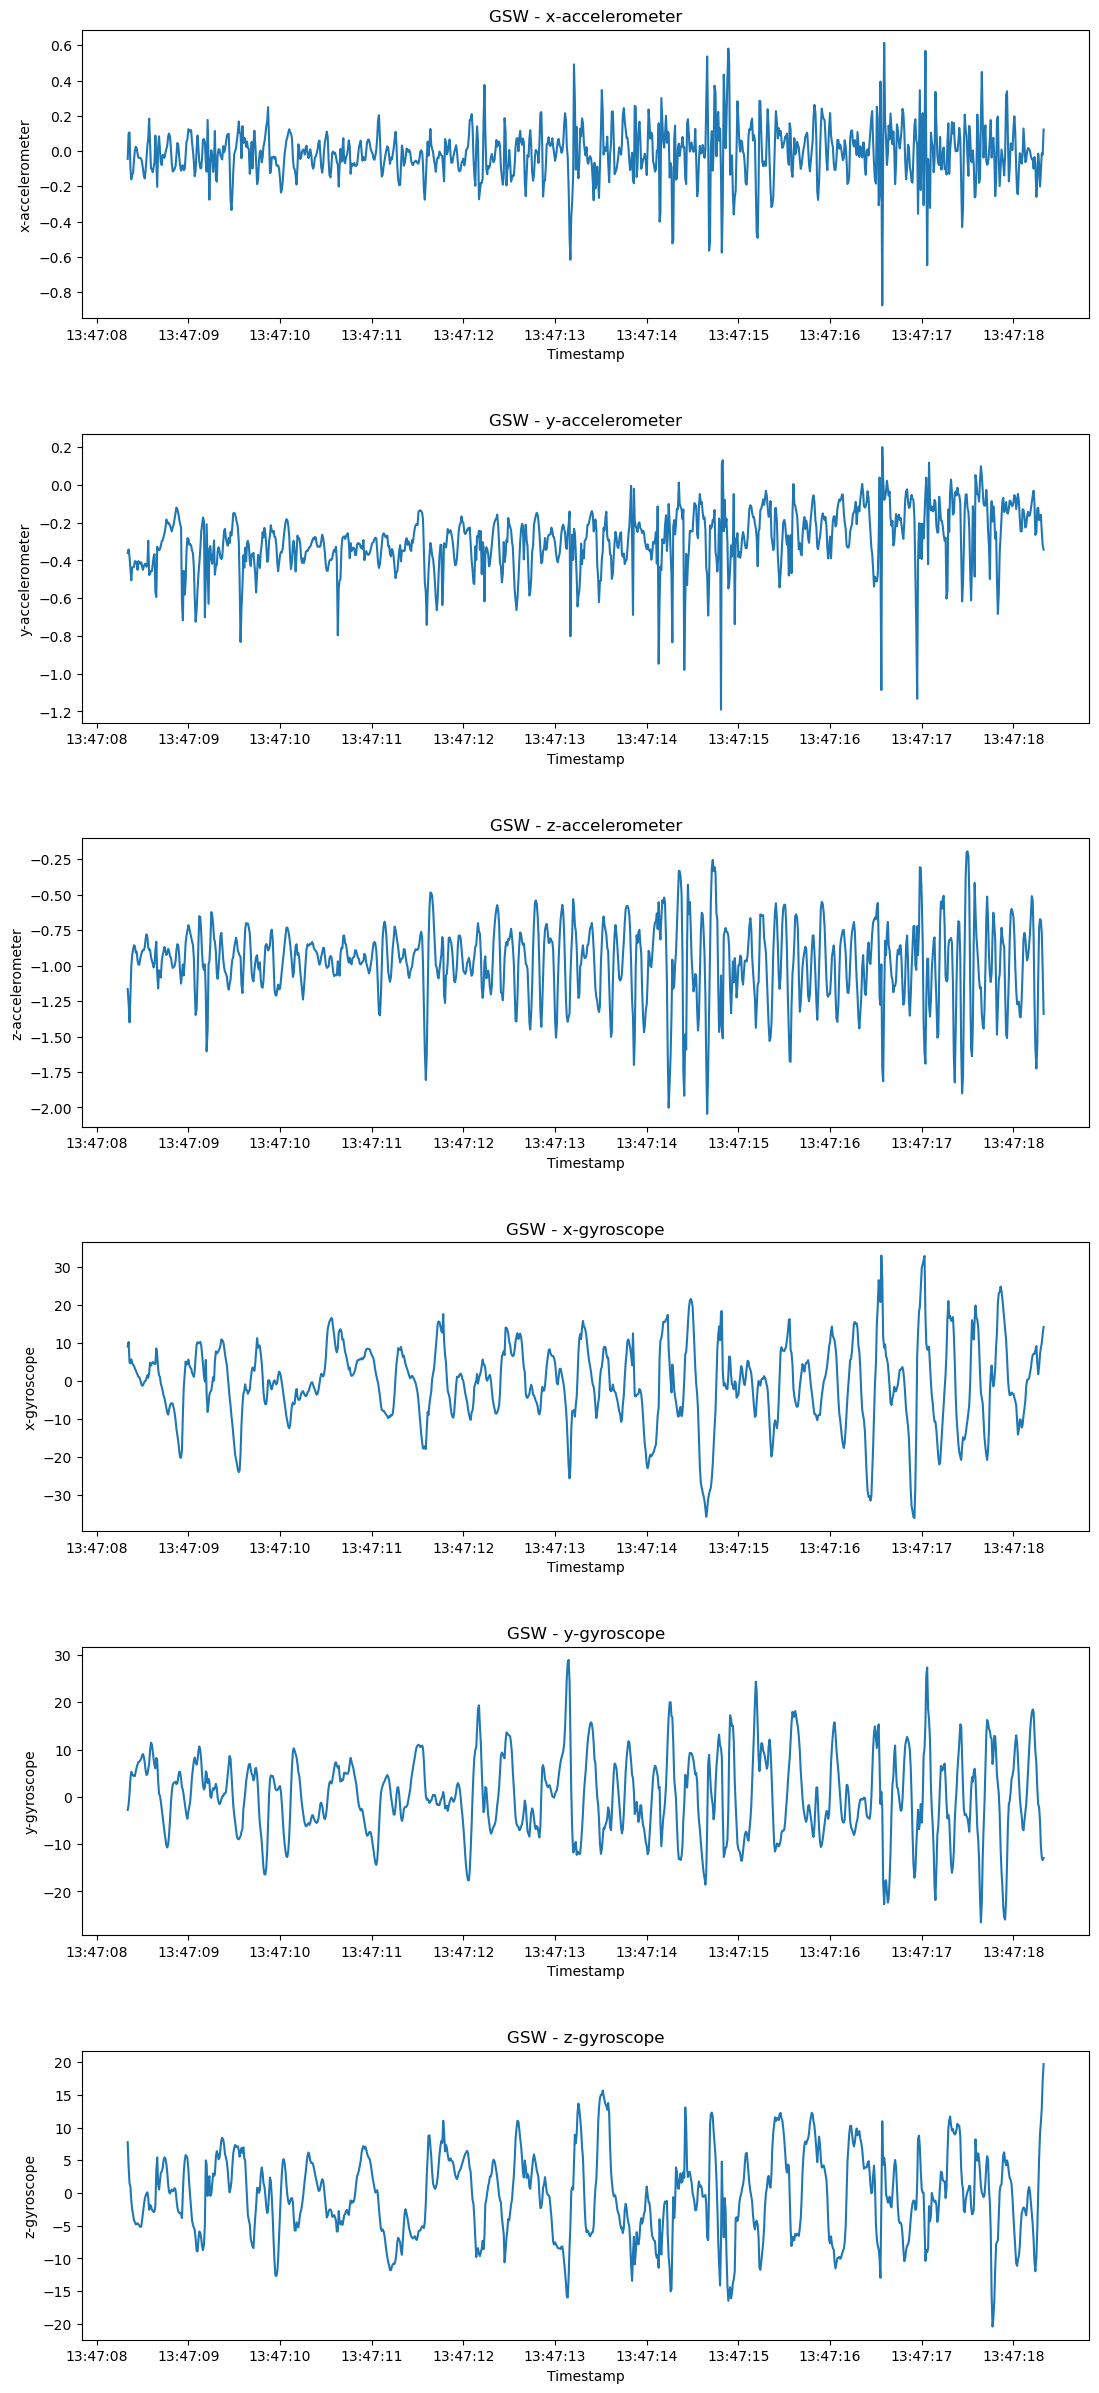

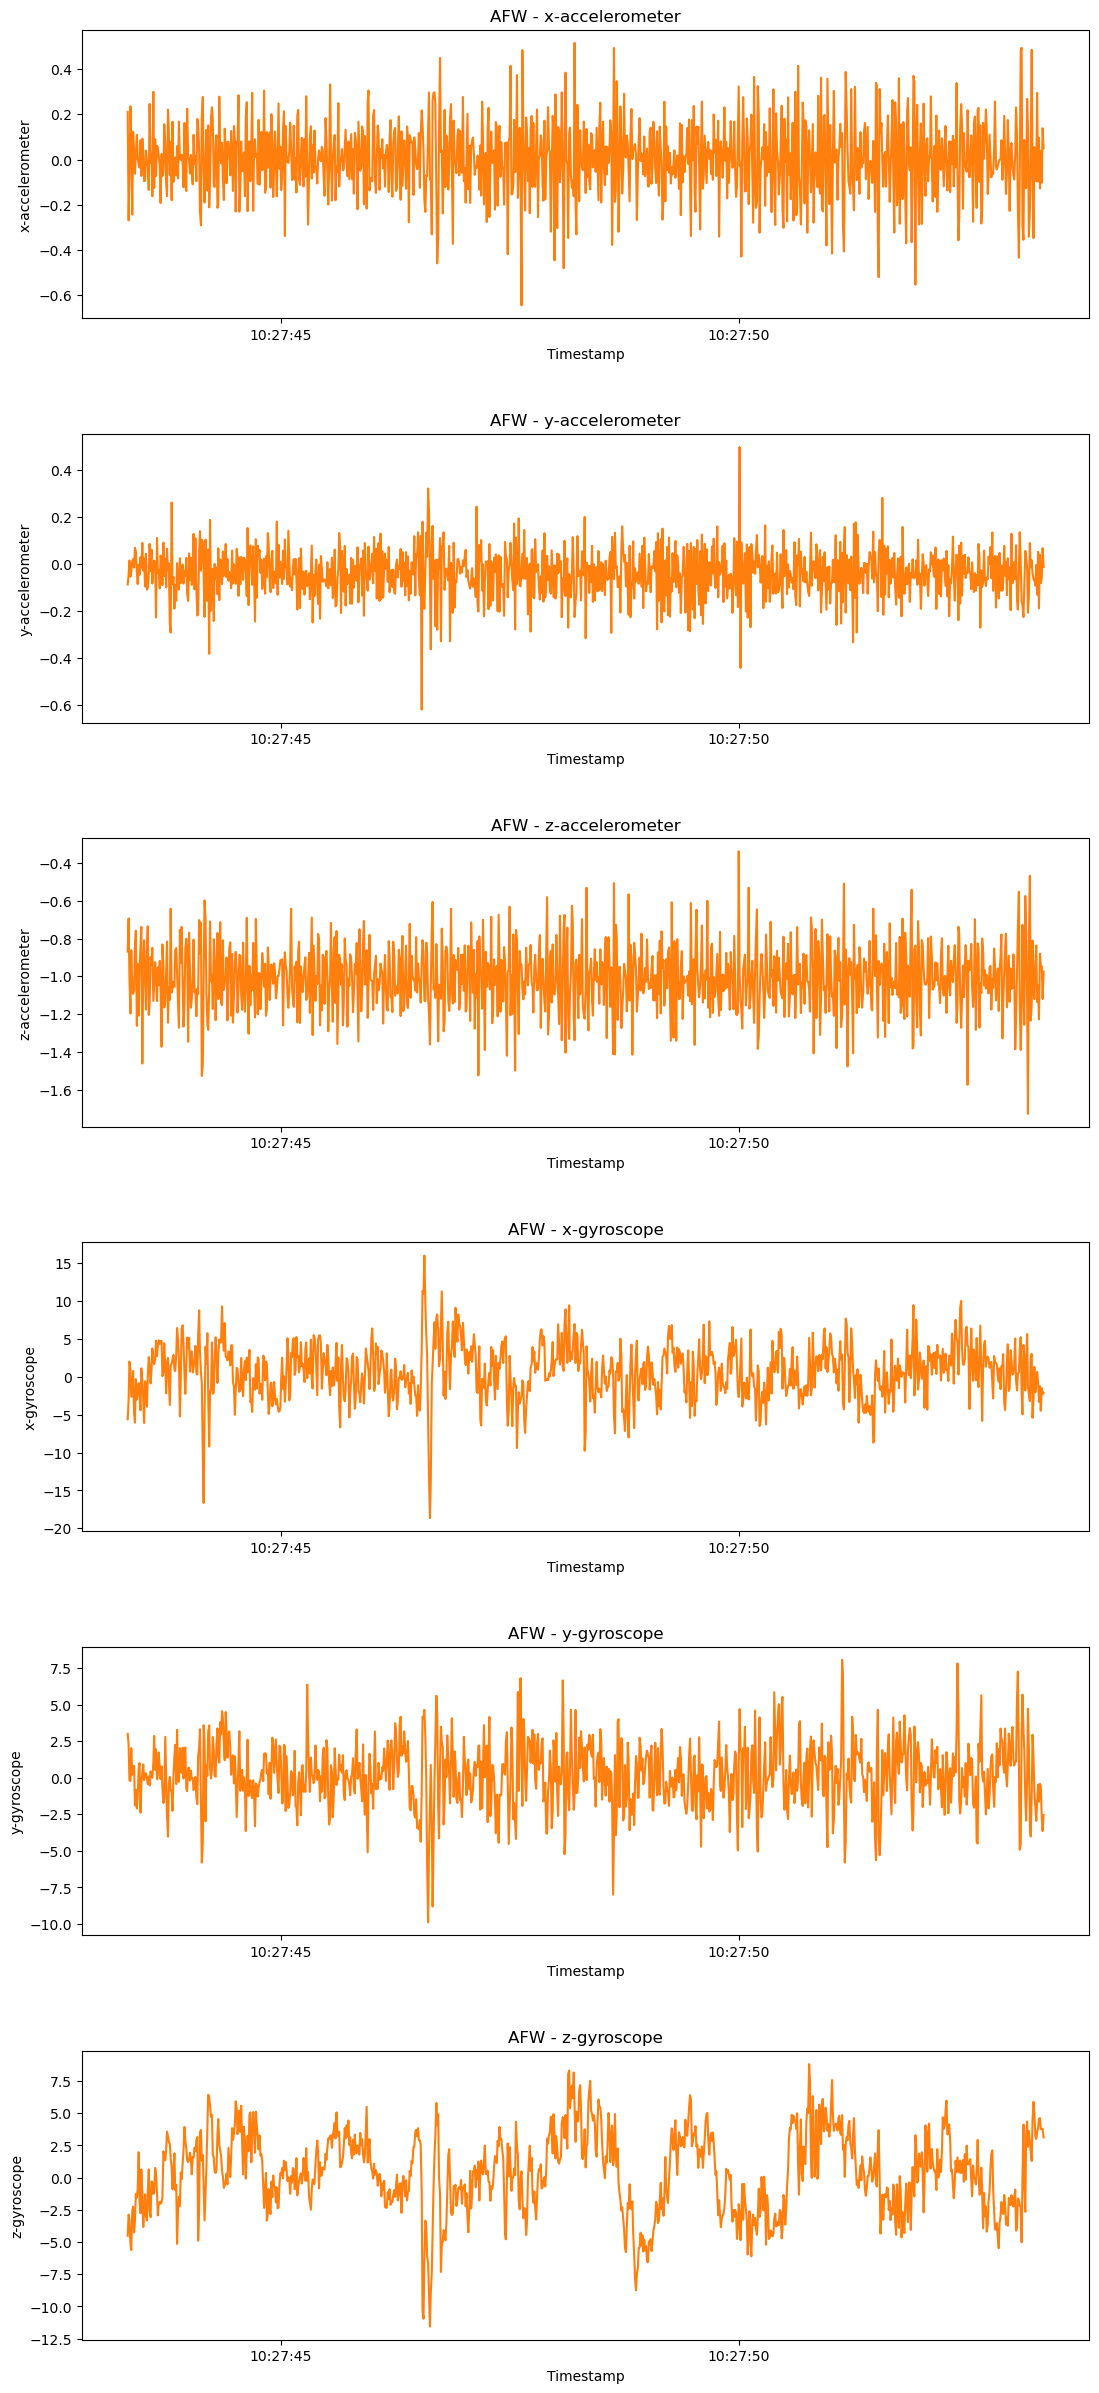

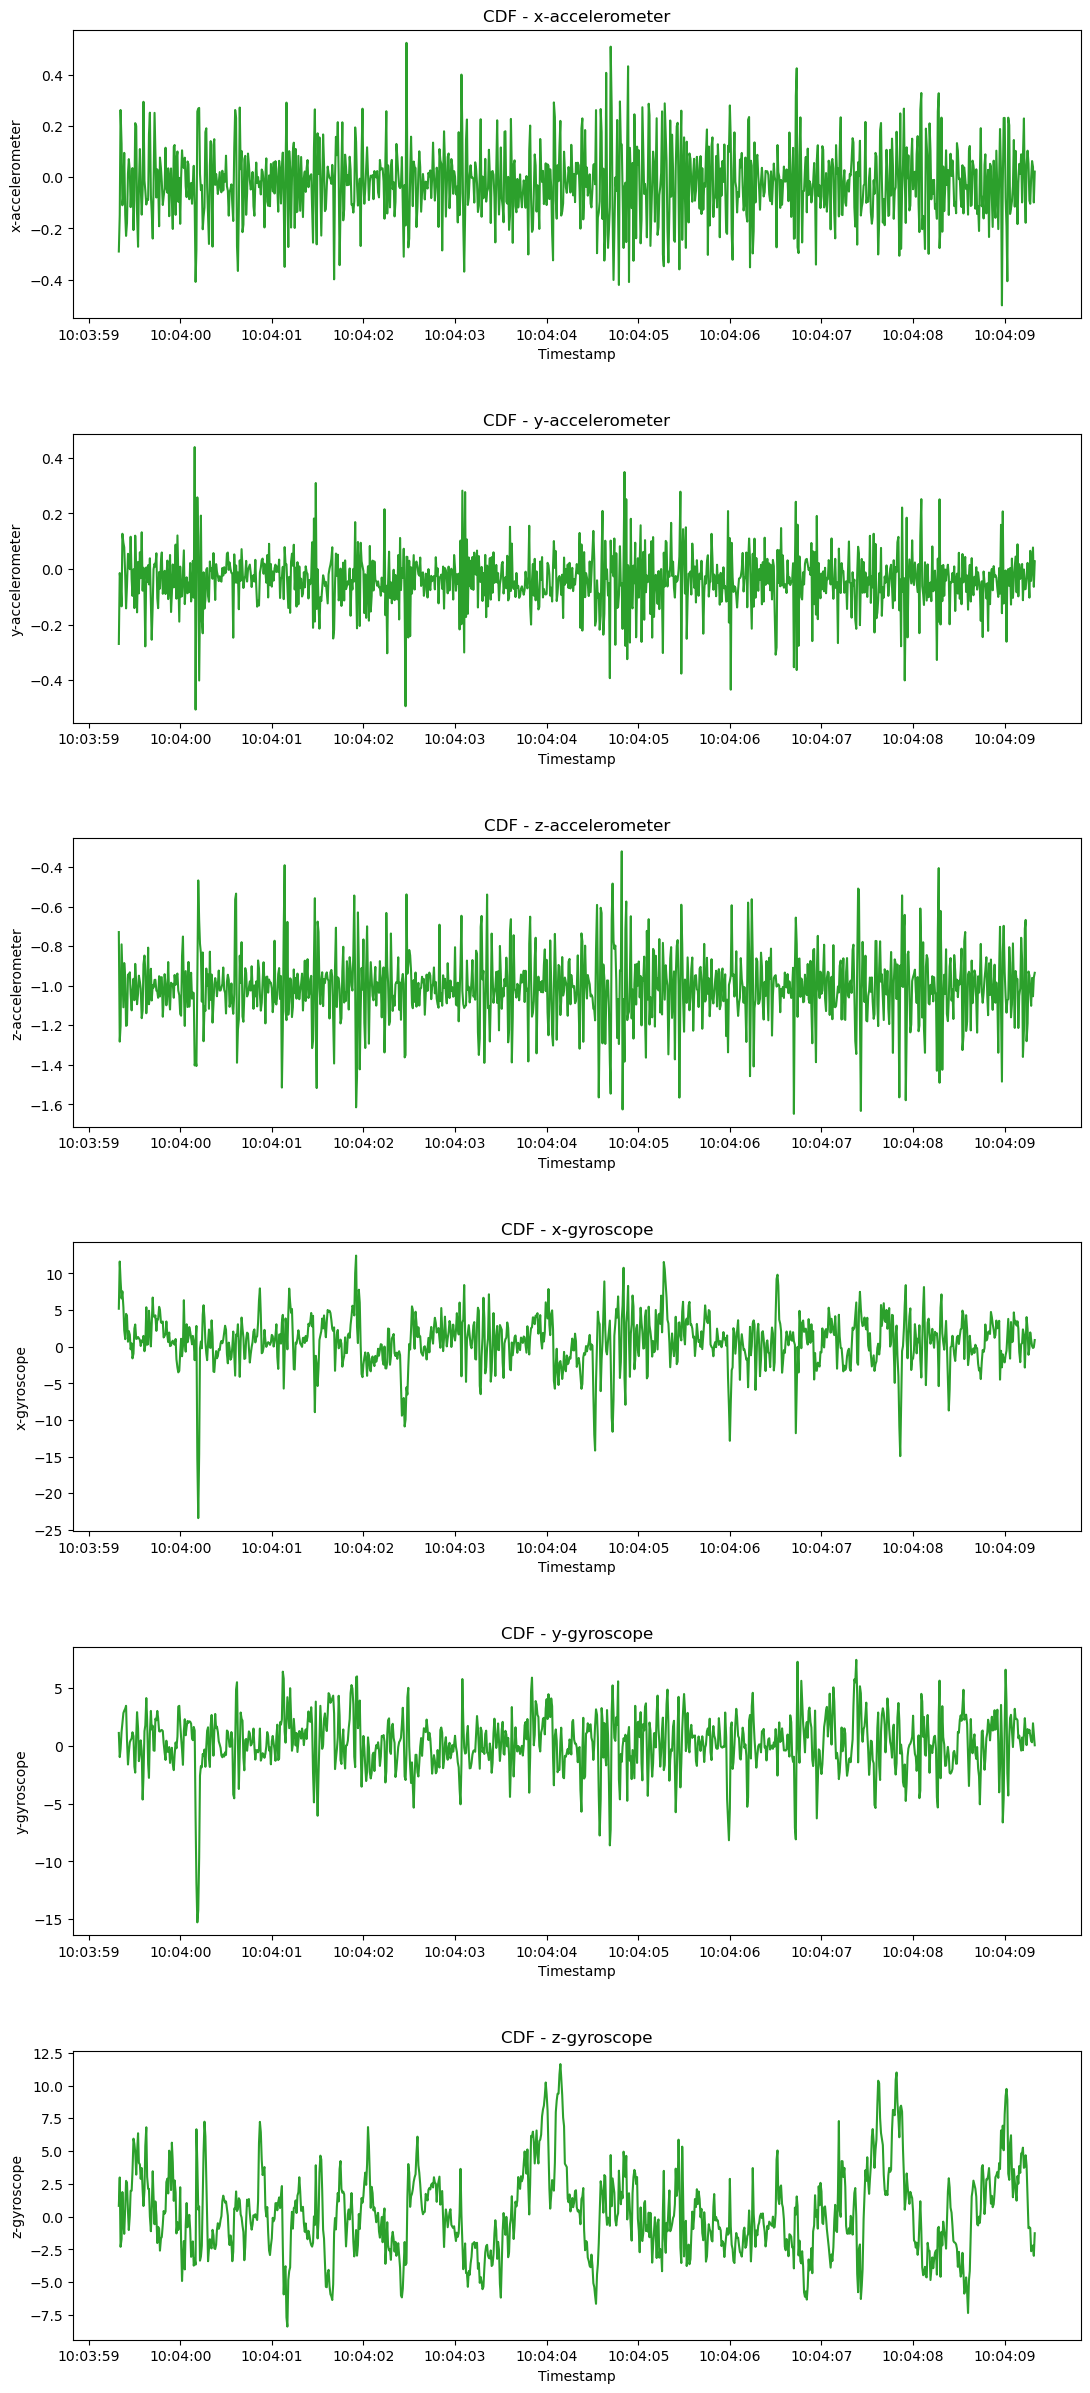

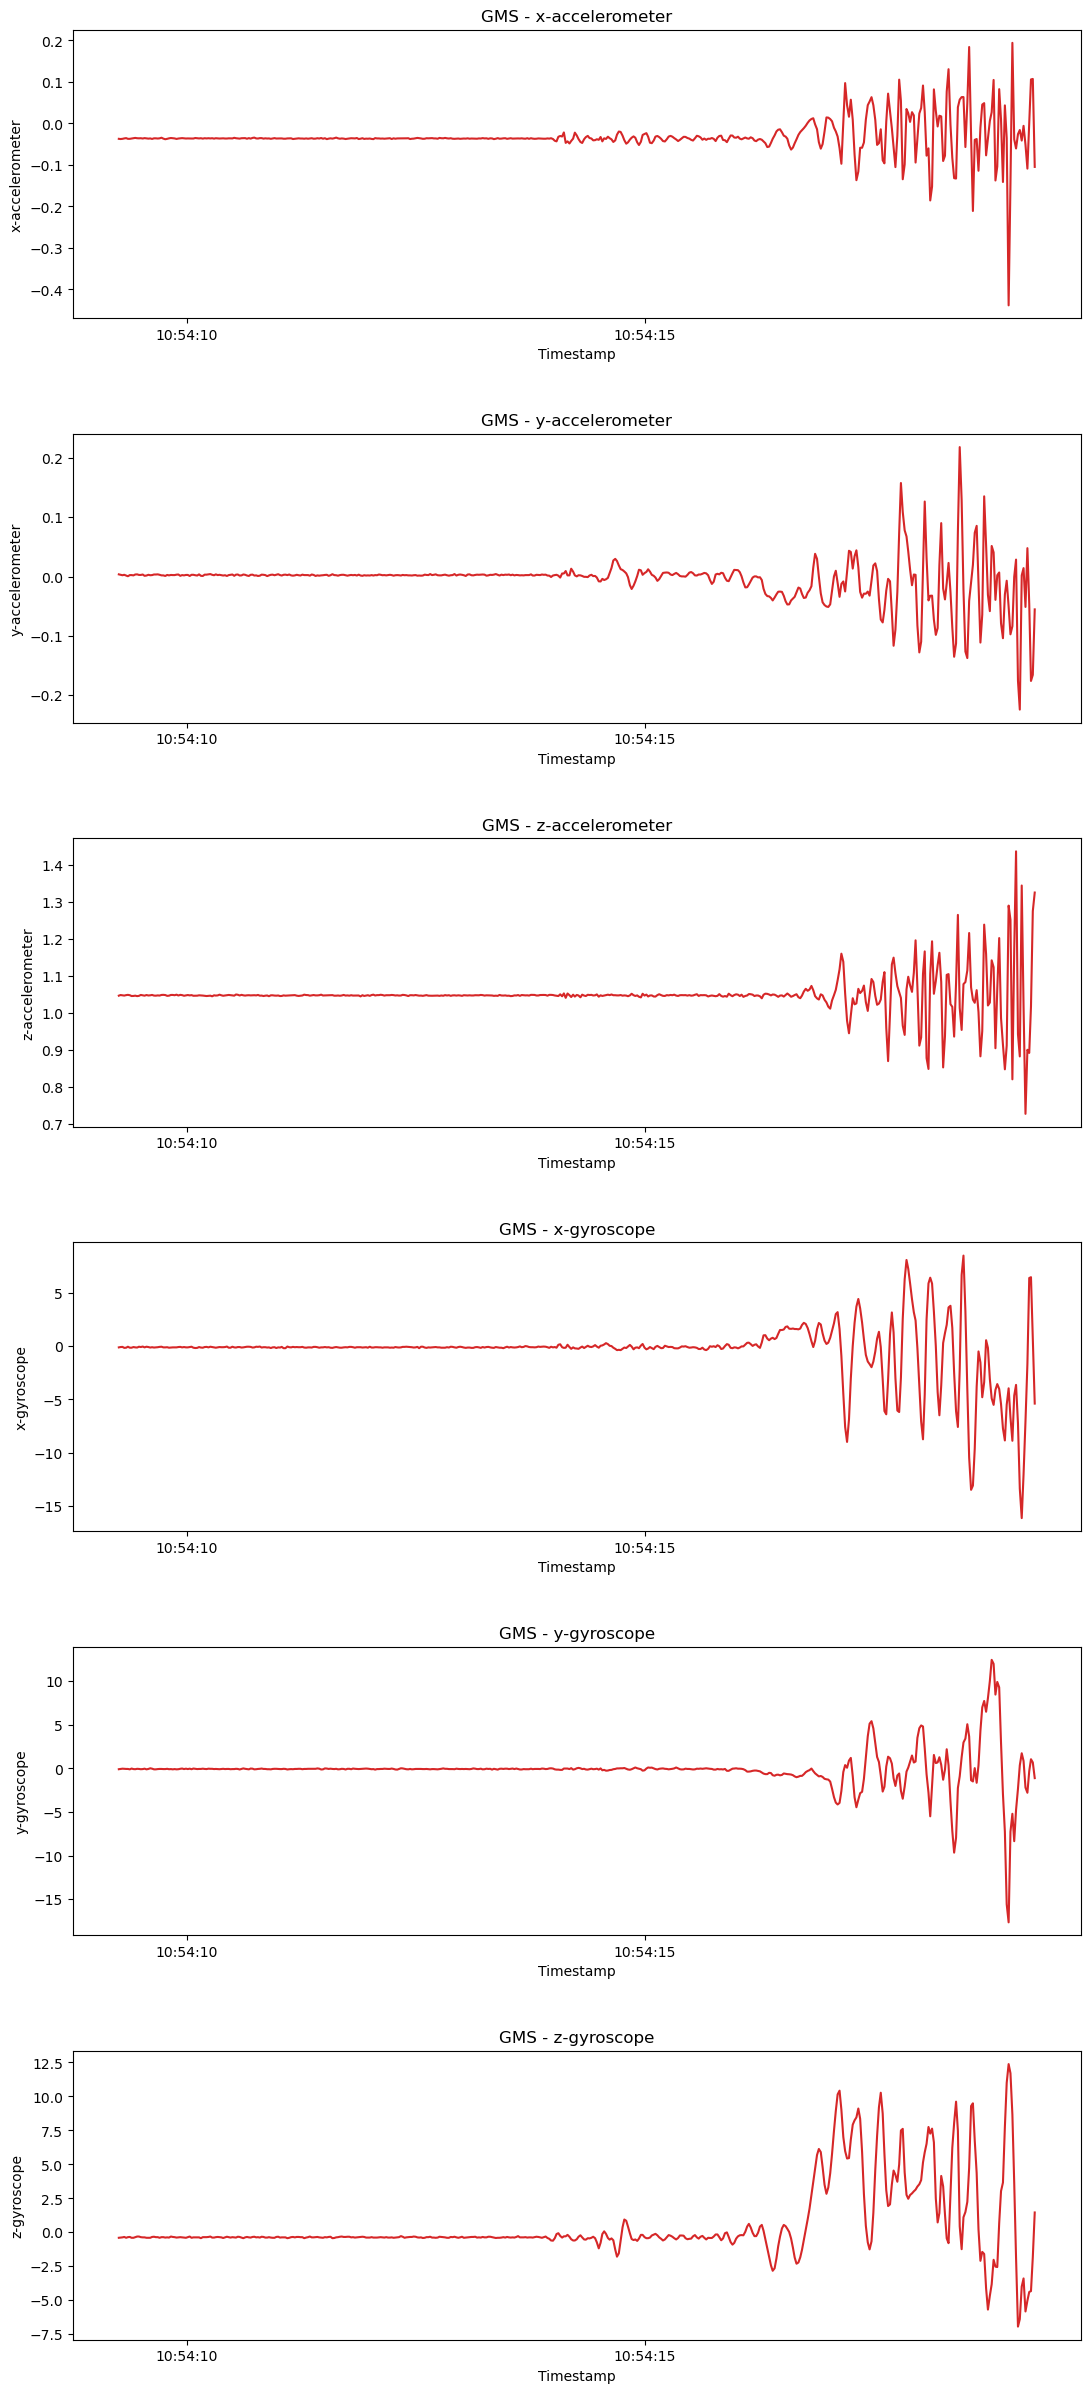

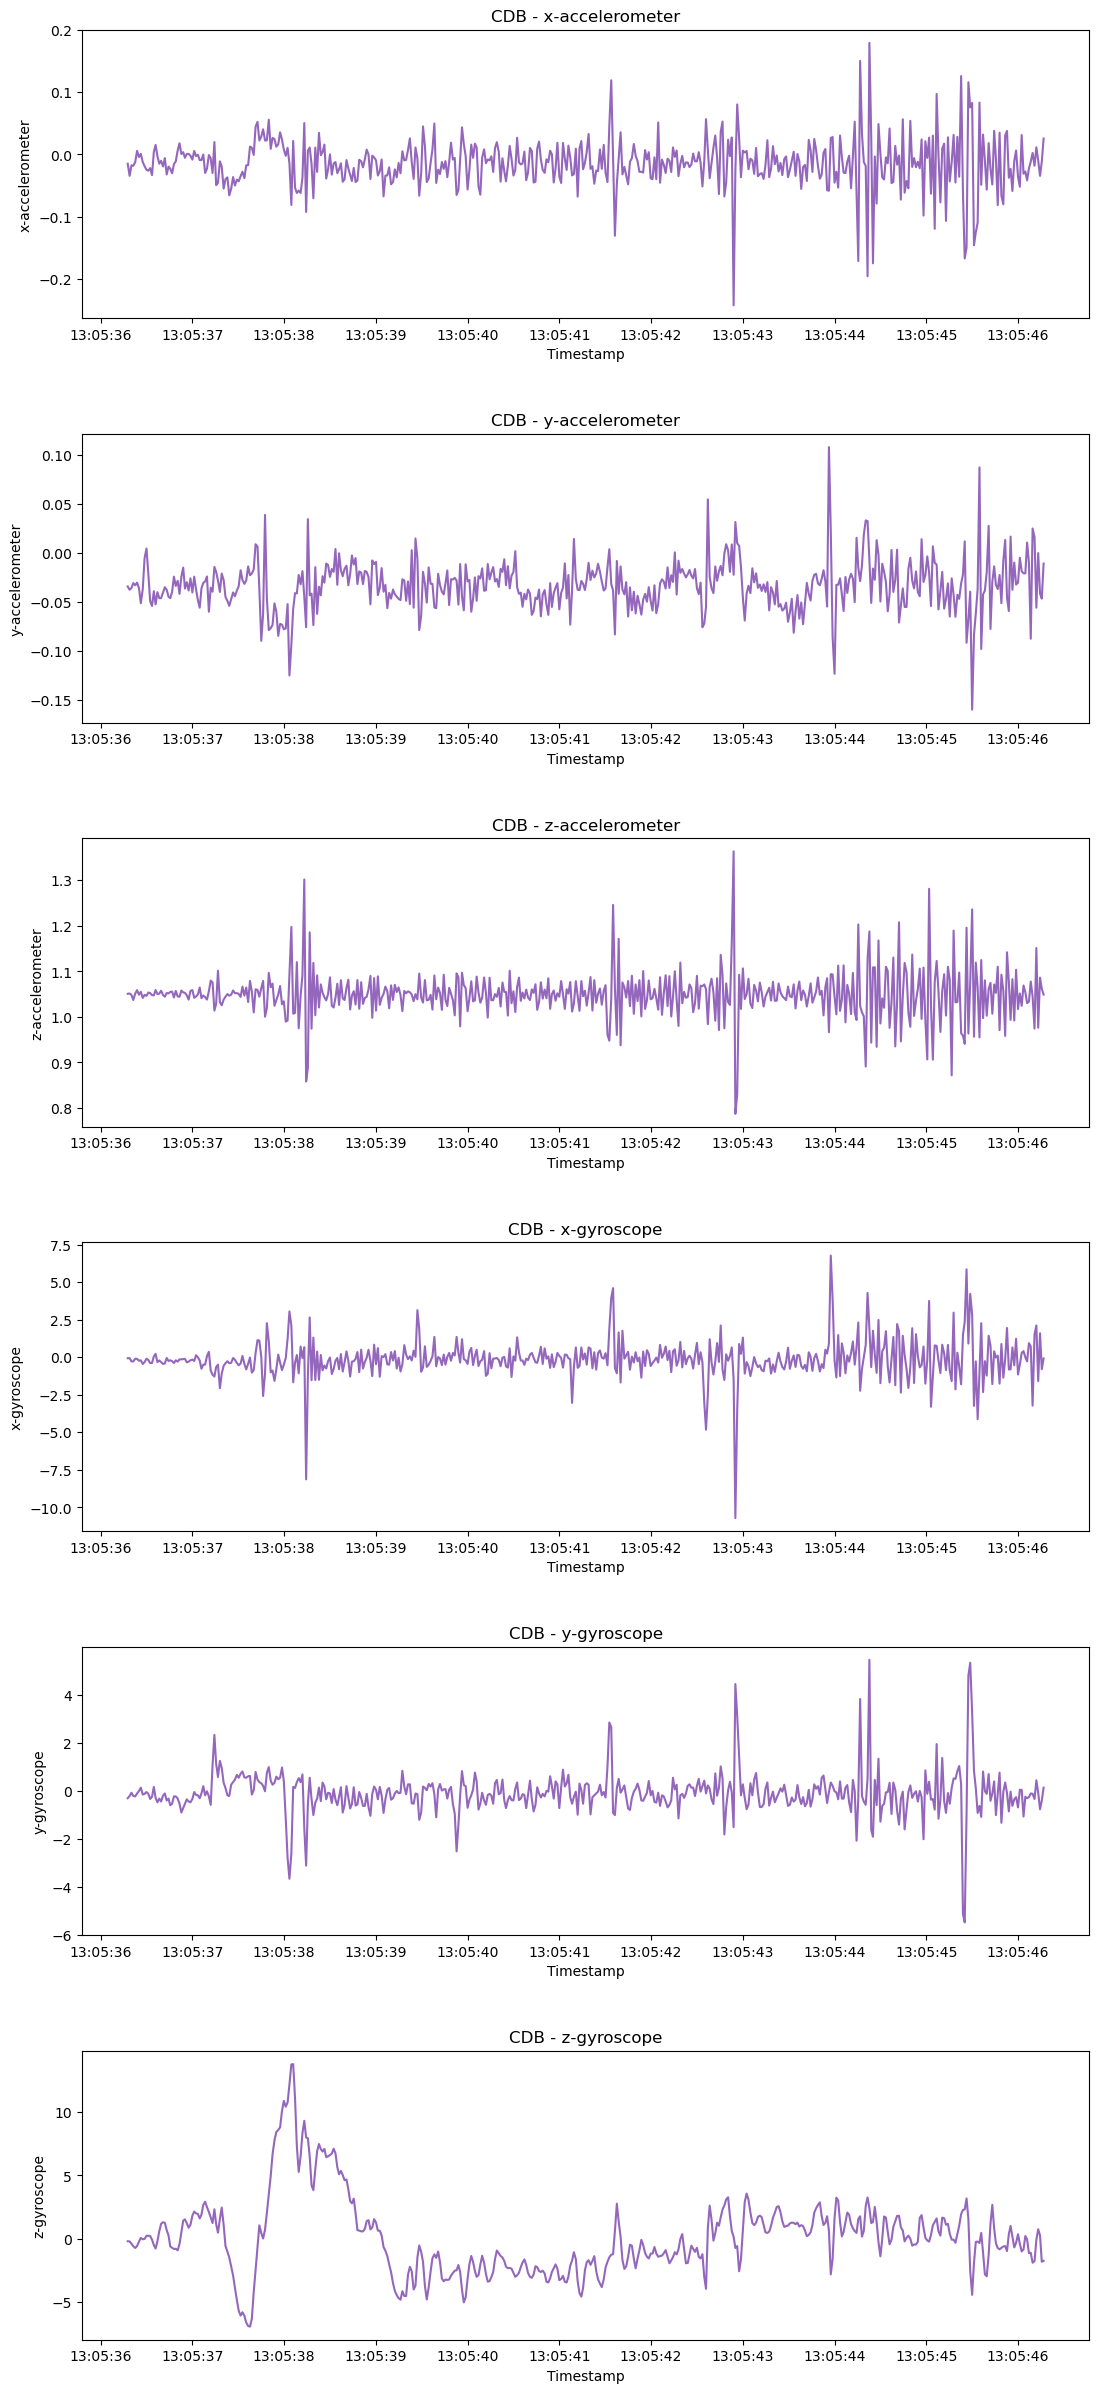

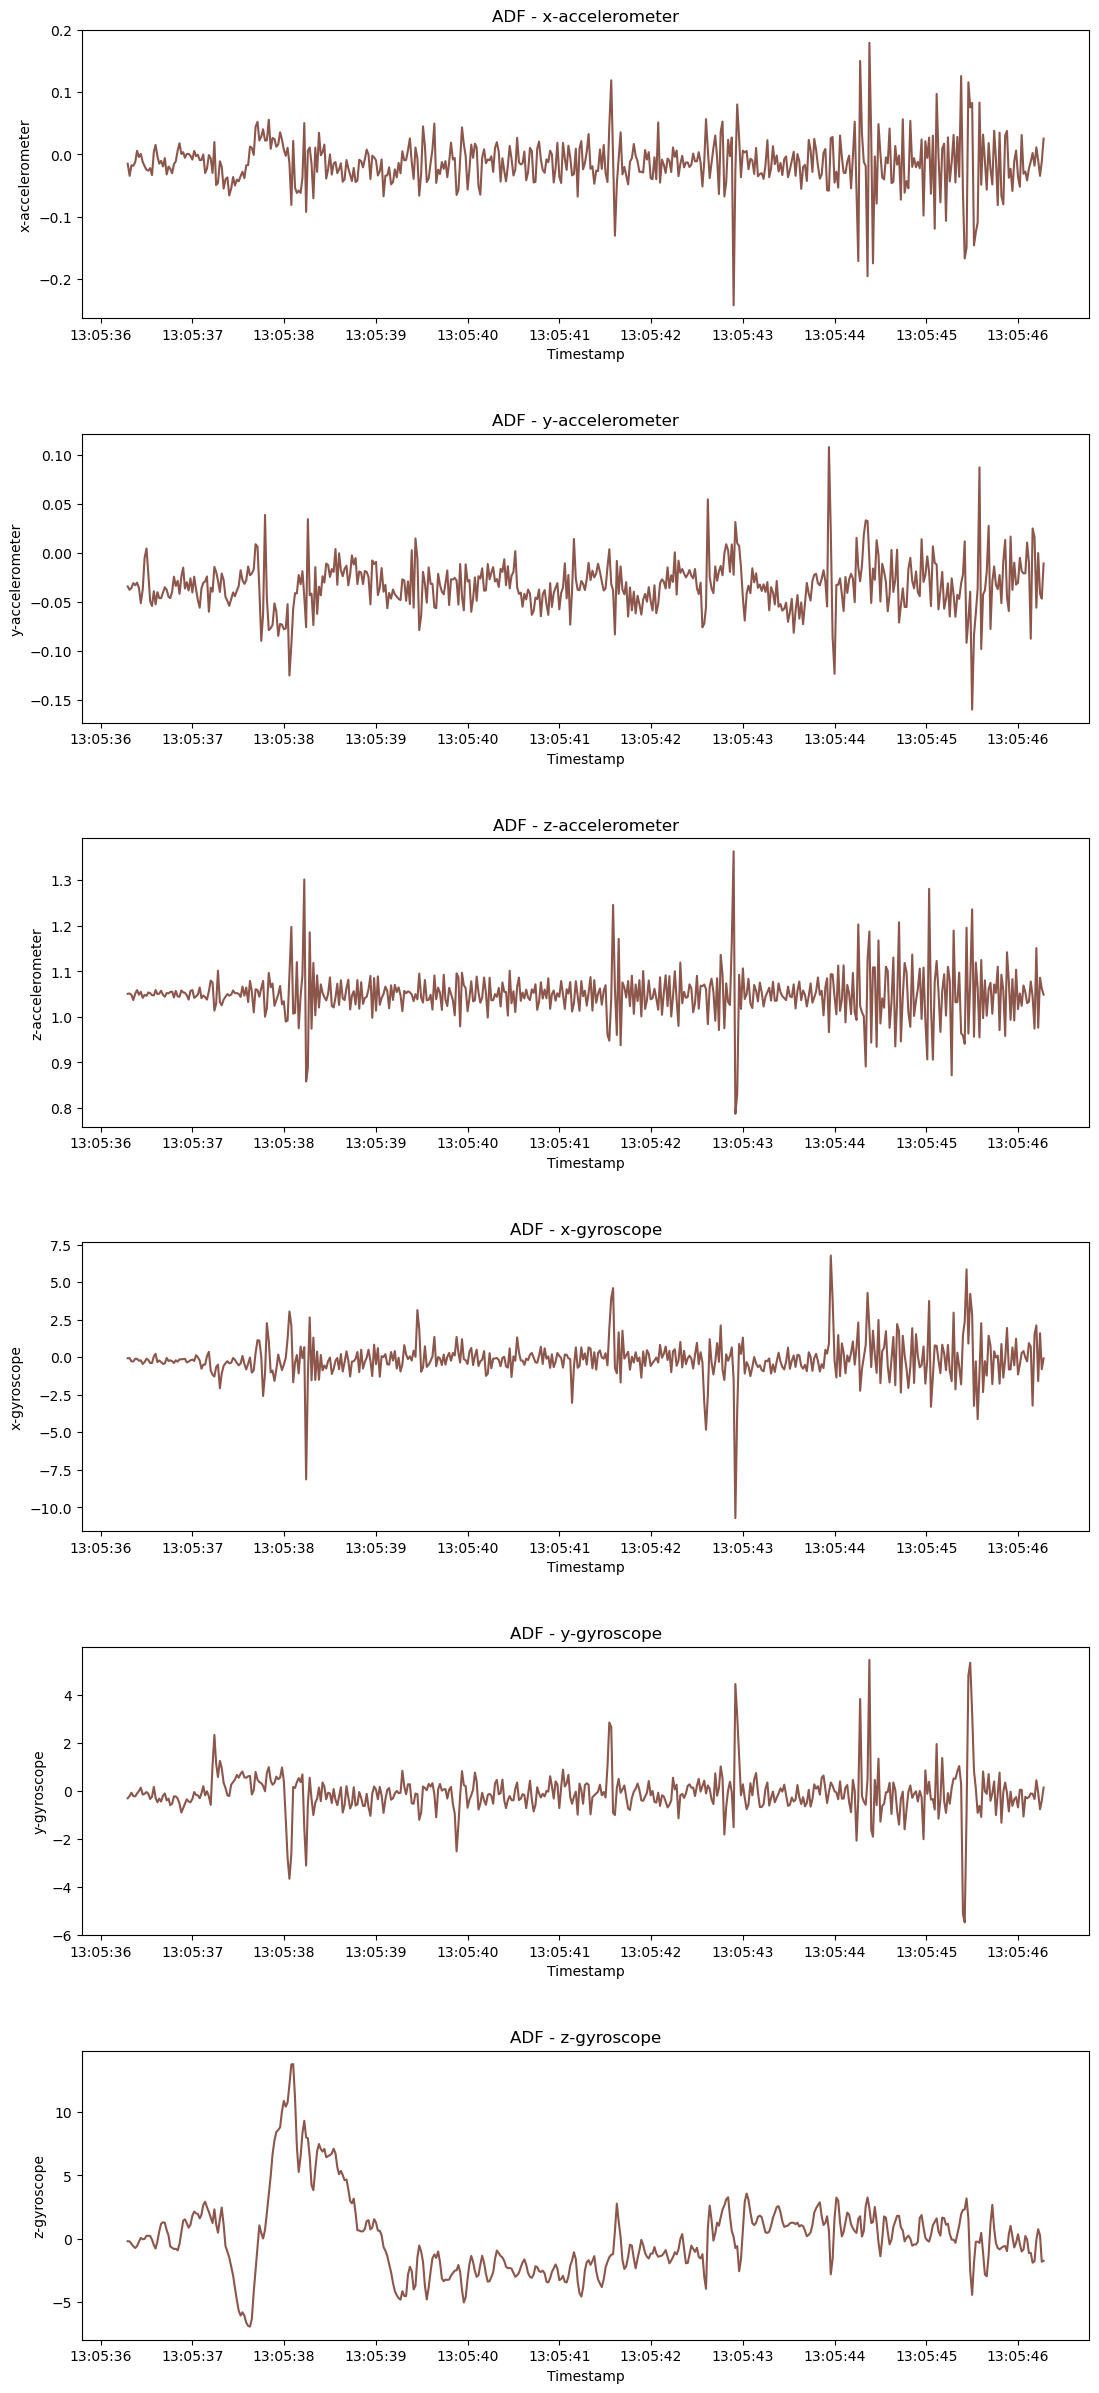

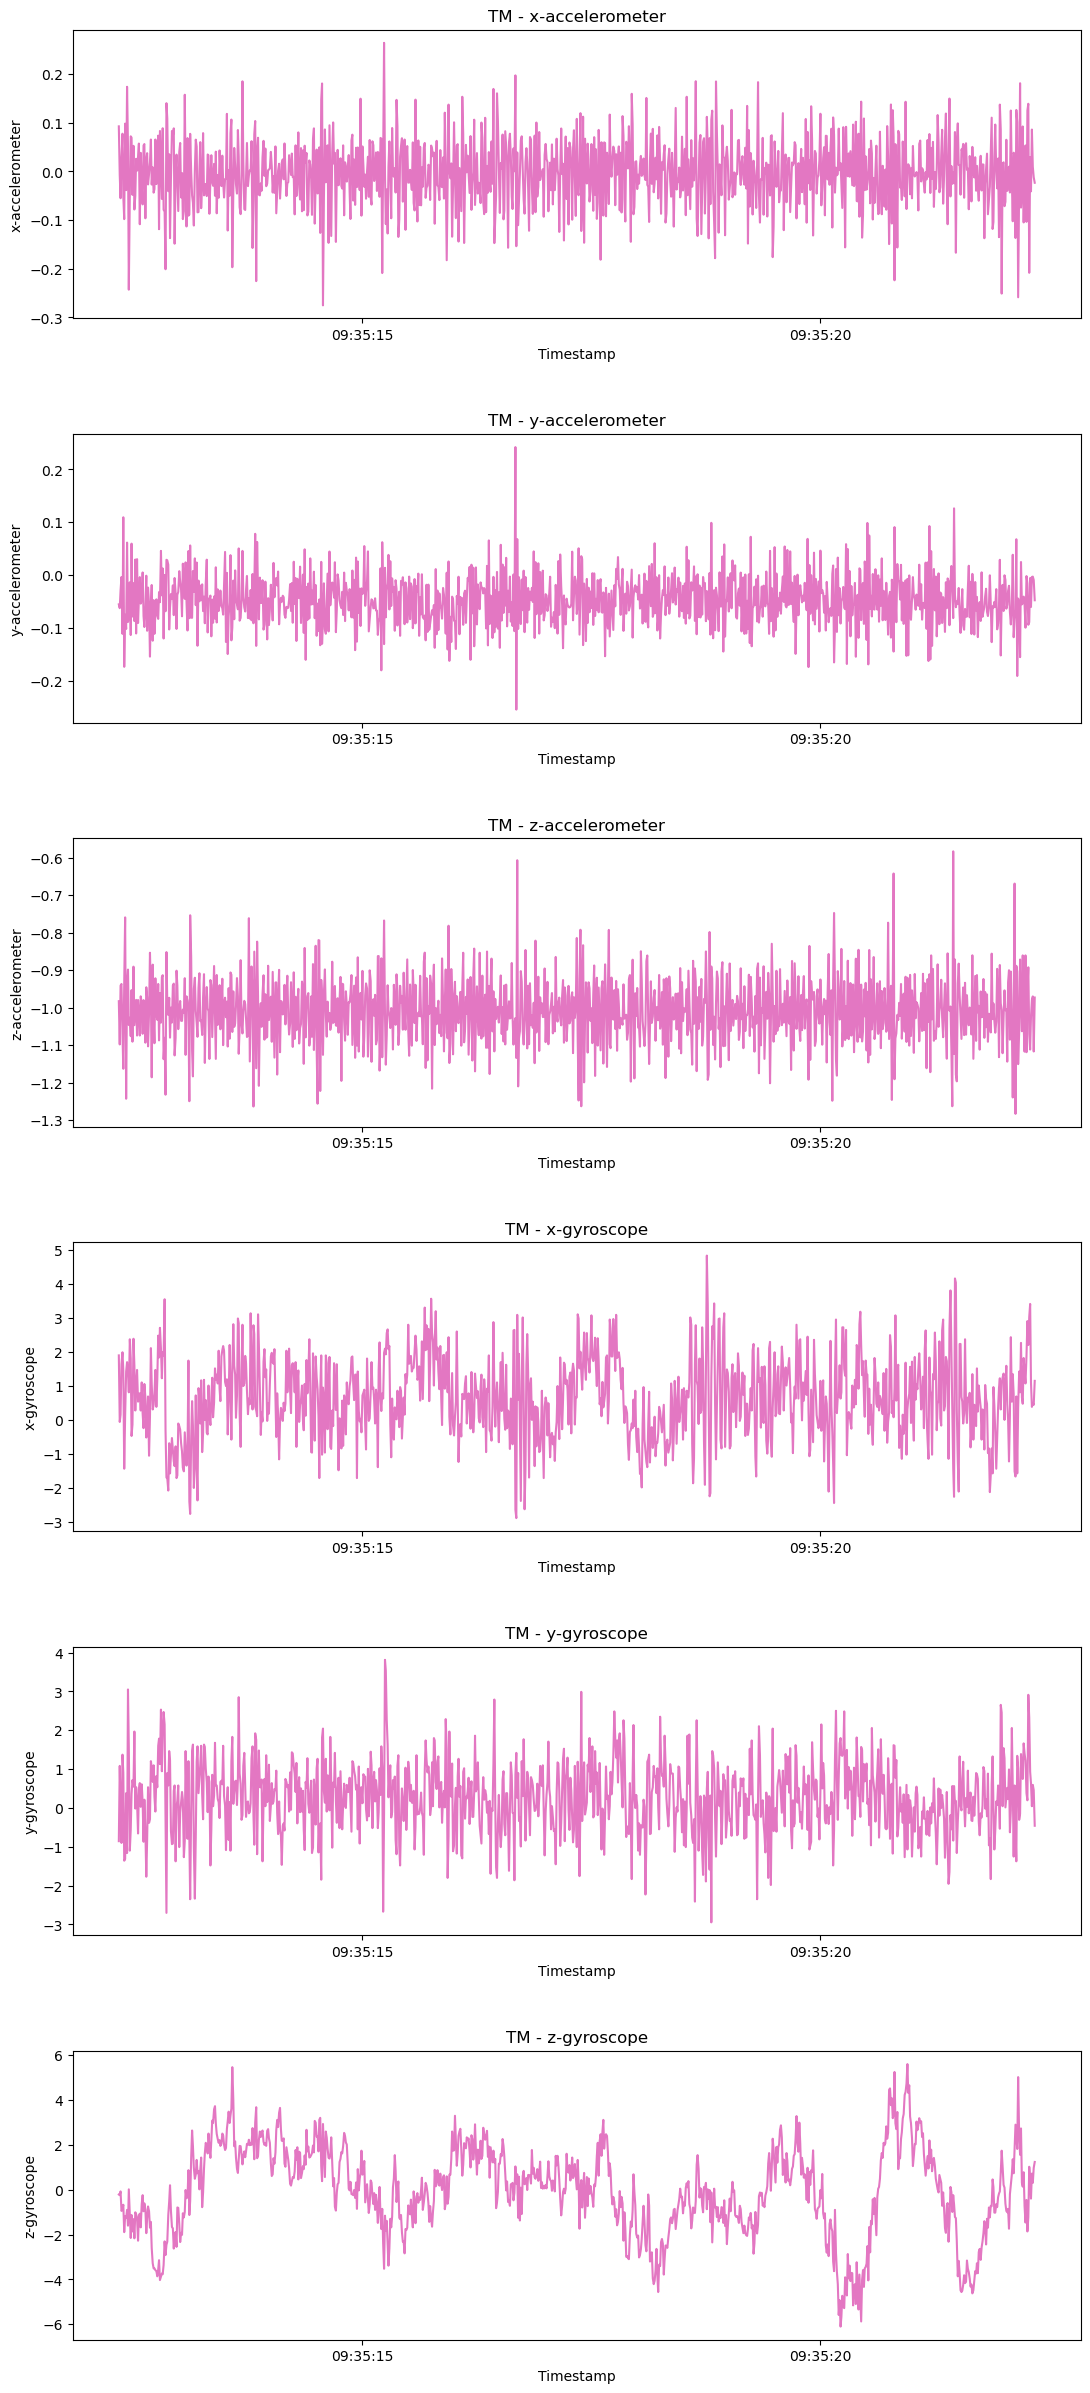

In [23]:
# All plots at once
import matplotlib # For defining color palette

# Assuming dict_of_tables_10_seconds is the dictionary containing filtered DataFrames
color_palette = matplotlib.colormaps.get_cmap('tab10') # Define a color palette

for color_index, (table_name, table) in enumerate(dict_of_tables_10_seconds.items()):
    fig, ax = plt.subplots(6, 1, figsize=(13, 30), gridspec_kw={'hspace': 0.4})
    
    for i, feature in enumerate(table.columns[1:], 0):  # Skipping the timestamp column:
        color = color_palette(color_index)  # Get color from the palette
        
        ax[i].plot(table['Timestamp'], table[feature], color=color)
        ax[i].set_title(f'{table_name} - {feature}')  # Adding table_name to the title
        ax[i].set_xlabel('Timestamp')
        ax[i].set_ylabel(feature)
    
    plt.show()


# Box Plots

In [24]:
print('The tables are:')
for item, key in dict_of_tables_10_seconds.items():
    print(item)


The tables are:
GSW
AFW
CDF
GMS
CDB
ADF
TM


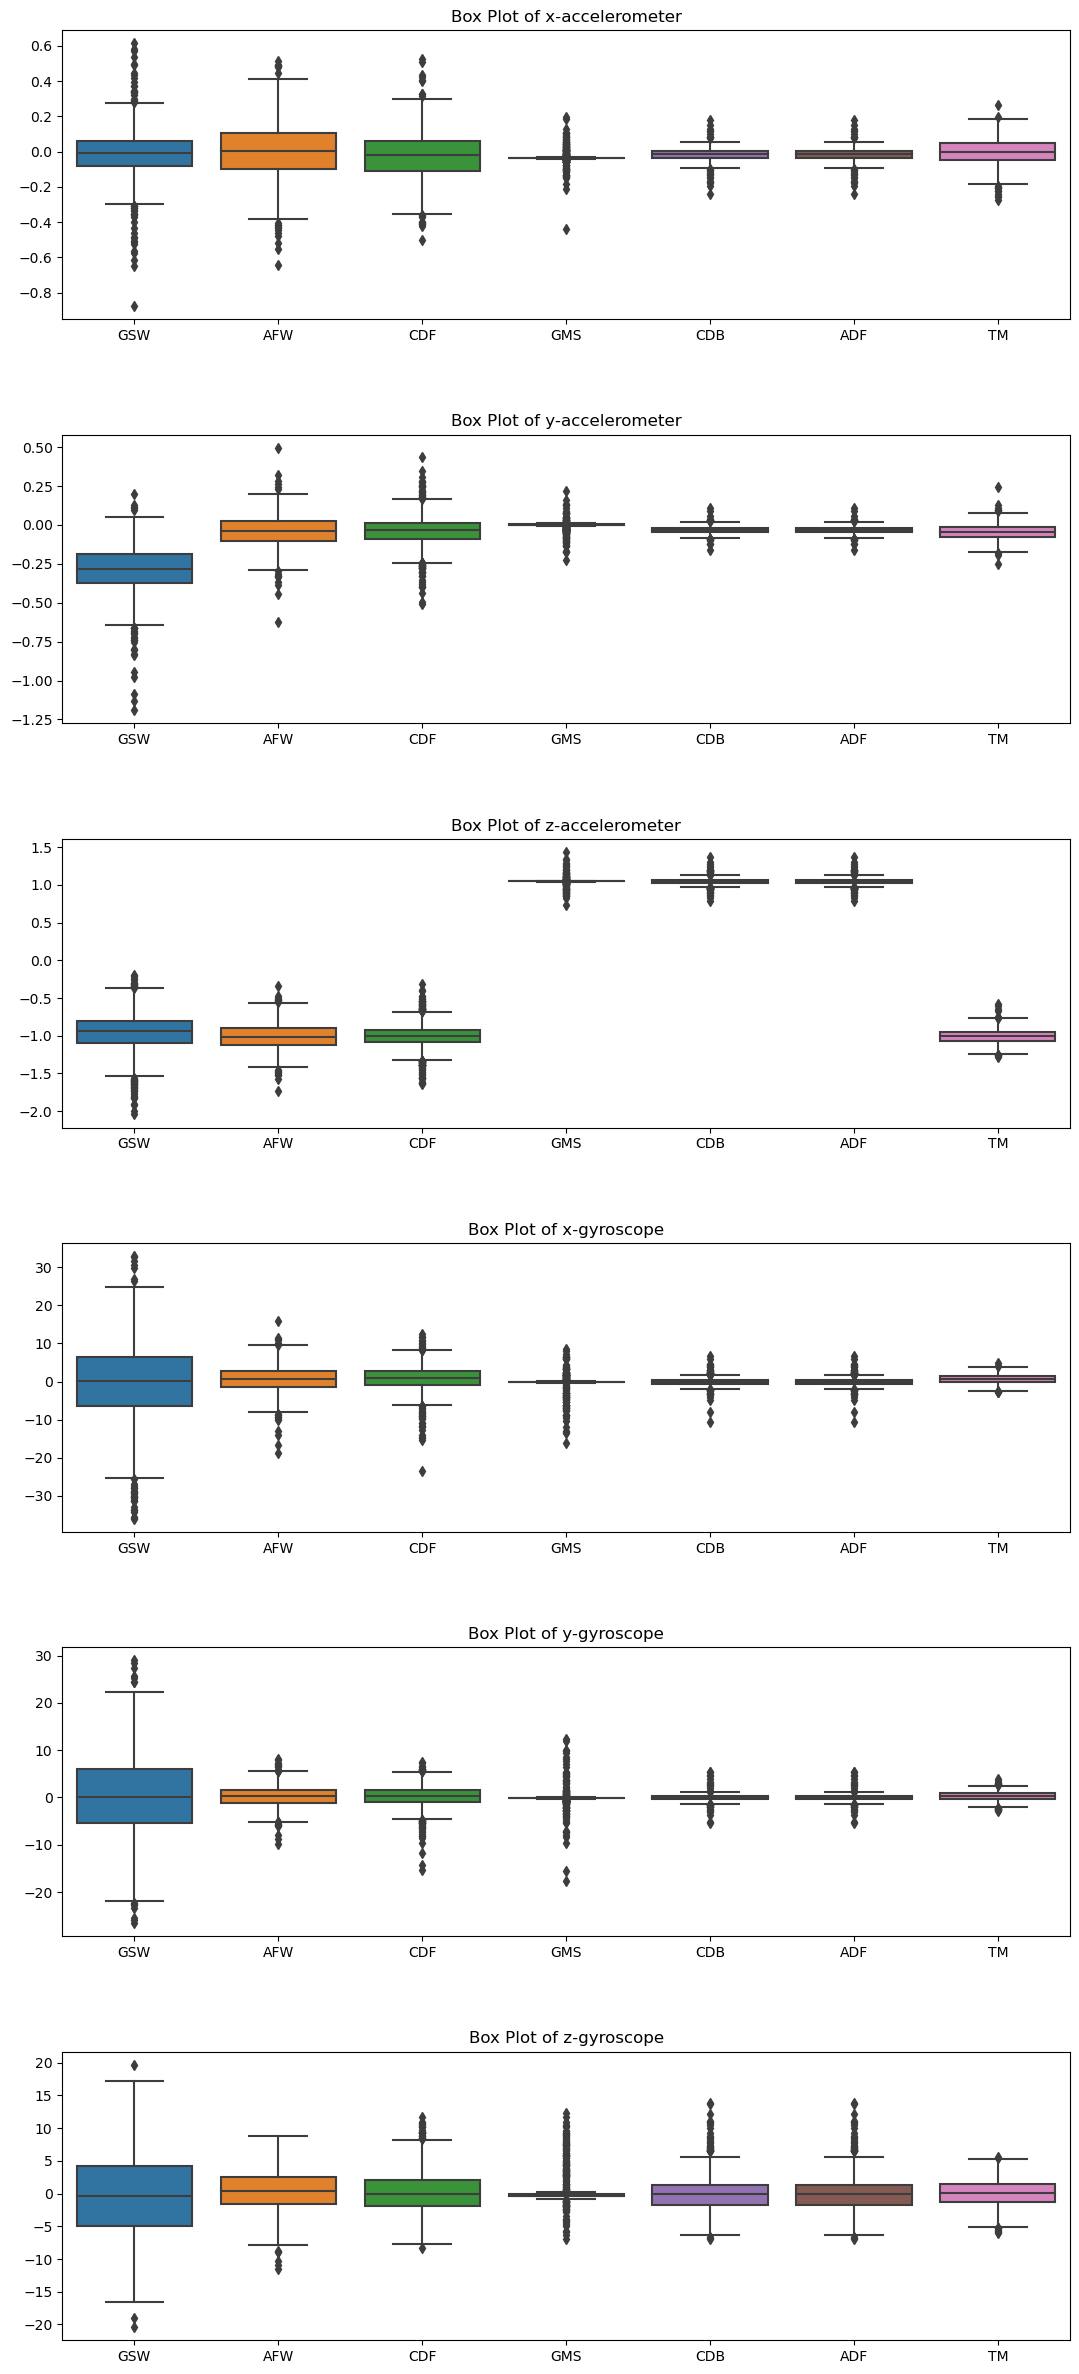

In [90]:
import seaborn as sns  # Importing seaborn for statistical visualization
# Creating a figure and a set of subplots with 6 rows and 1 column, adjusting the figure size and spacing between subplots
fig, ax = plt.subplots(6, 1, figsize=(13, 30), gridspec_kw={'hspace': 0.4})

# Extracting the features to plot from the 'GSW' DataFrame
features_to_plot = dict_of_tables_10_seconds['GSW'].columns[1:]

# Iterating over each feature to plot
for i, feature in enumerate(features_to_plot, 0):
    
    # Creating a DataFrame containing the values of the current feature for each team
    data_to_plot = pd.DataFrame({'GSW': dict_of_tables_10_seconds['GSW'][feature],
                                 'AFW': dict_of_tables_10_seconds['AFW'][feature],
                                 'CDF': dict_of_tables_10_seconds['CDF'][feature],
                                 'GMS': dict_of_tables_10_seconds['GMS'][feature],
                                 'CDB': dict_of_tables_10_seconds['CDB'][feature],
                                 'ADF': dict_of_tables_10_seconds['ADF'][feature],
                                 'TM': dict_of_tables_10_seconds['TM'][feature]})
    
    # Creating a box plot for the current feature using seaborn, specifying the subplot for plotting
    sns.boxplot(data=data_to_plot, ax=ax[i])
    
    # Setting the x-axis ticks and labels to indicate the teams
    ax[i].set_xticks([0, 1, 2, 3, 4, 5, 6])
    ax[i].set_xticklabels(['GSW', 'AFW', 'CDF', 'GMS', 'CDB', 'ADF', 'TM'])
    
    # Setting the title for the subplot indicating the type of plot and the feature being plotted
    ax[i].set_title(f'Box Plot of {feature}')


## Data Preprocessing

## Model Training and Evaluation 

## hyper Parameters Tuning

## Final Stage

In [ ]:
# import matplotlib.pyplot as plt

# # Assuming dict_of_tables_5_seconds is the dictionary containing filtered DataFrames
# for table_name, table in dict_of_tables_5_seconds.items():
#     fig, ax = plt.subplots(len(table.columns) - 1, 1, figsize=(13, 3*(len(table.columns) - 1)), gridspec_kw={'hspace': 0.4})
    
#     for i, feature in enumerate(table.columns[1:], 0):  # Assuming first column is Timestamp
#         ax[i].plot(table['Timestamp'], table[feature], color='green')
#         ax[i].set_title(feature)
#         ax[i].set_xlabel('Timestamp')
#         ax[i].set_ylabel(feature)
    
#     plt.show()


In [ ]:
# import matplotlib.pyplot as plt  
# import matplotlib # For defining color palette

# # dict_of_tables_5_seconds is the dictionary containing filtered DataFrames
# color_palette = matplotlib.colormaps.get_cmap('tab10') # Define a color palette

# # Iterating over each DataFrame in the dictionary
# for color_index, (table_name, table) in enumerate(dict_of_tables_5_seconds.items()):
    
#     # Creating subplots based on the number of columns in the DataFrame
#     fig, ax = plt.subplots(len(table.columns) - 1, 1, figsize=(13, 30), gridspec_kw={'hspace': 0.4})
    
#     # Iterating over each feature column in the DataFrame, skipping the timestamp column
#     for i, feature in enumerate(table.columns[1:], 0):
#         color = color_palette(color_index)  # Get color from the palette based on the index
        
#         # Plotting the feature against the timestamp
#         ax[i].plot(table['Timestamp'], table[feature], color=color)
#         ax[i].set_title(f'{table_name} - {feature}')  # Adding DataFrame name and feature name to the title
#         ax[i].set_xlabel('Timestamp')  # Setting x-axis label
#         ax[i].set_ylabel(feature)  # Setting y-axis label
    
#     plt.show()  # Displaying the plot


In [70]:
# # Assuming dict_of_tables_5_seconds is the dictionary containing filtered DataFrames
# for table_name, table in dict_of_tables_5_seconds.items():
#     fig, ax = plt.subplots(len(table.columns) - 1, 1, figsize=(13, 3*(len(table.columns) - 1)), gridspec_kw={'hspace': 0.4})
    
#     for i, feature in enumerate(table.columns[1:], 0):  # Assuming first column is Timestamp
#         ax[i].plot(table['Timestamp'], table[feature], color='green')
#         ax[i].set_title(f'{table_name} - {feature}')  # Adding table_name to the title
#         ax[i].set_xlabel('Timestamp')
#         ax[i].set_ylabel(feature)
    
#     plt.show()


In [81]:
# import seaborn as sns
# fig, ax = plt.subplots(6, 1, figsize=(13, 30), gridspec_kw={'hspace': 0.4})

# features_to_plot = dict_of_tables_5_seconds['GSW'].columns[1:]

# for i, feature in enumerate(features_to_plot, 0):
    
#     data_to_plot = pd.DataFrame({'GSW': dict_of_tables_5_seconds['GSW'][feature],
#                                  'AFW': dict_of_tables_5_seconds['AFW'][feature],
#                                  'CDF': dict_of_tables_5_seconds['CDF'][feature],
#                                  'GMS': dict_of_tables_5_seconds['GMS'][feature],
#                                  'CDB':dict_of_tables_5_seconds['CDB'][feature],
#                                  'ADF':dict_of_tables_5_seconds['ADF'][feature],
#                                  'TM':dict_of_tables_5_seconds['TM'][feature]})
    
#     sns.boxplot(data = data_to_plot, ax = ax[i])
    
#     ax[i].set_xticks([0, 1, 2,3,4,5,6])
    
#     ax[i].set_xticklabels(['GSW', 'AFW', 'CDF','GMS','CDB','ADF','TM'])
    
#     ax[i].set_title(f'Box Plot of {feature}')